In [85]:
import numpy as np
import matplotlib.pyplot as plt
N = 25
X = np.reshape(np.linspace(0, 0.9, N), (N, 1))
Y = np.cos(10*X**2) + 0.1 * np.sin(100*X)
Y[Y!=Y[0]].reshape(-1,1).shape

(24, 1)

In [2]:
#define basis functions, note the input data shape must be Nx1
def polynomial_basis(x, j):
    return x**j

def trigonometric_basis(x, j):
    val_j = np.sin(2*np.pi*j*x)
    val_j_plus_1 = np.cos(2*np.pi*j*x)
    return np.concatenate((val_j, val_j_plus_1), axis=1)

In [3]:
#helper function to populate the design matrix (NxM)
def generate_design_matrix(x, basis, order):
    degrees_list = list(range(1, order+1))
    bias_term = np.ones(x.shape)
    if order == 0:
        return bias_term
    terms_list = [basis(x, degree) for degree in degrees_list]
    total = [bias_term] + terms_list
    return np.concatenate(total, axis=1)

In [4]:
#helper function to compute the optimal weight w, avoiding direct inverse
def compute_w(phi, y):
    #the "b" term for system ax = b, where x is the parameter w to compute
    b_term = phi.T@y
    #the "a" term for system ax = b, where x is the parameter w to compute
    a_term = phi.T@phi
    w = np.linalg.solve(a_term, b_term)
    return w

In [5]:
#helper function to compute the optimal variance
def compute_variance(phi, w, y):
    square_loss_sum = 0
    for i in range(len(y)):
        square_loss_sum += (y[i] - w.T@phi[i])**2
    return square_loss_sum/(len(y))

In [6]:
#helper function to get predicted mean
def get_predicted_mean(x, w, basis, order):
    phi = generate_design_matrix(x=x, basis=basis, order=order)
    predicted_mean = np.zeros(x.shape)
    for i in range(len(x)):
        predicted_mean[i] = w.T@phi[i]
    return predicted_mean

In [7]:
#for part (a)
#generate design matrices according to order
phi_a_0 = generate_design_matrix(X, polynomial_basis, 0)
phi_a_1 = generate_design_matrix(X, polynomial_basis, 1)
phi_a_2 = generate_design_matrix(X, polynomial_basis, 2)
phi_a_3 = generate_design_matrix(X, polynomial_basis, 3)
phi_a_11 = generate_design_matrix(X, polynomial_basis, 11)
#now compute the optimal parameters
w_a_0 = compute_w(phi_a_0, Y)
v_a_0 = compute_variance(phi_a_0, w_a_0, Y)
w_a_1 = compute_w(phi_a_1, Y)
v_a_1 = compute_variance(phi_a_1, w_a_1, Y)
w_a_2 = compute_w(phi_a_2, Y)
v_a_2 = compute_variance(phi_a_2, w_a_2, Y)
w_a_3 = compute_w(phi_a_3, Y)
v_a_3 = compute_variance(phi_a_3, w_a_3, Y)
w_a_11 = compute_w(phi_a_11, Y)
v_a_11 = compute_variance(phi_a_11, w_a_11, Y)

In [8]:
#populate the predicted means with interval -0.3 to 1.3
X_range = np.linspace(-0.3, 1.3).reshape(-1,1)
mean_a_0 = get_predicted_mean(x=X_range, w=w_a_0, basis=polynomial_basis, order=0)
mean_a_1 = get_predicted_mean(x=X_range, w=w_a_1, basis=polynomial_basis, order=1)
mean_a_2 = get_predicted_mean(x=X_range, w=w_a_2, basis=polynomial_basis, order=2)
mean_a_3 = get_predicted_mean(x=X_range, w=w_a_3, basis=polynomial_basis, order=3)
mean_a_11 = get_predicted_mean(x=X_range, w=w_a_11, basis=polynomial_basis, order=11)

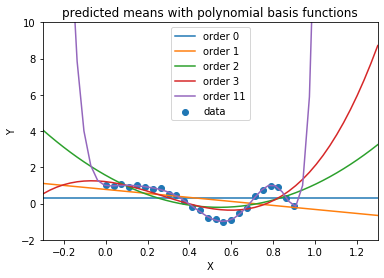

In [39]:
fig1 = plt.figure()
plt.scatter(X, Y, label='data')
plt.plot(X_range, mean_a_0, label='order 0')
plt.plot(X_range, mean_a_1, label='order 1')
plt.plot(X_range, mean_a_2, label='order 2')
plt.plot(X_range, mean_a_3, label='order 3')
plt.plot(X_range, mean_a_11, label='order 11')
plt.xlim(-0.3, 1.3)
plt.ylim(-2, 10)
plt.title('predicted means with polynomial basis functions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.savefig("predicted means with polynomial basis functions for (a).png") 
plt.show()

In [156]:
#for part (b)
#generate design matrices according to order
phi_b_1 = generate_design_matrix(X, trigonometric_basis, 1)
phi_b_12 = generate_design_matrix(X, trigonometric_basis, 11)
#now compute the optimal parameters
w_b_1 = compute_w(phi_b_1, Y)
v_b_1 = compute_variance(phi_b_1, w_b_1, Y)
w_b_12 = compute_w(phi_b_12, Y)
v_b_12 = compute_variance(phi_b_12, w_b_12, Y)

In [157]:
#populate the predicted means with interval -1 to 1.2
X_range_b = np.linspace(-1, 1.2).reshape(-1,1)
mean_b_1 = get_predicted_mean(x=X_range_b, w=w_b_1, basis=trigonometric_basis, order=1)
mean_b_12 = get_predicted_mean(x=X_range_b, w=w_b_12, basis=trigonometric_basis, order=11)

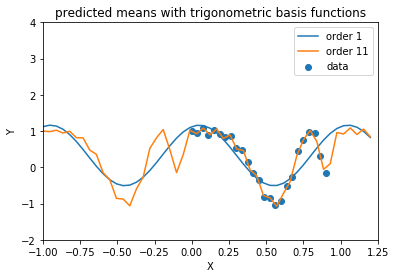

In [158]:
fig2 = plt.figure()
plt.scatter(X, Y, label='data')
plt.plot(X_range_b, mean_b_1, label='order 1')
plt.plot(X_range_b, mean_b_12, label='order 11')
plt.xlim(-1, 1.25)
plt.ylim(-2, 4)
plt.title('predicted means with trigonometric basis functions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.savefig("predicted means with trigonometric basis functions for (b).png") 
plt.show()

In [58]:
# #part (c)
# #helper function to generate a list of model parameters according to orders
# def generate_model_lists(orders):
#     w_list = []
#     variances_list = []
#     for i, order in enumerate(orders):
#         phi = generate_design_matrix(X, trigonometric_basis, order)
#         w = compute_w(phi, Y)
#         w_list.append(w)
#         v = compute_variance(phi, w, Y)
#         variances_list.append(v)
#     return w_list, variances_list

In [137]:
# orders_range = list(range(0,11))
# ws,vs = generate_model_lists(orders=orders_range)
# vs
# get_predicted_mean(X[-1].reshape(-1,1), ws[1], trigonometric_basis, 1)

25

In [130]:
#part (c)
#function to perform cross validation and compute cross validation loss
def get_cv_loss(order):
    """takes an argument for the order of basis function
       returns a tuple, first element is the average test error, second is average variance
    """
    sum_square_error = 0
    sum_variance = 0
    for idx in range(len(Y)):
        #split the dataset according to leave-one-out
        training_X = X[X!=X[idx]].reshape(-1,1)
        training_Y = Y[Y!=Y[idx]].reshape(-1,1)
        validation_X = X[idx].reshape(-1,1)
        validation_Y = Y[idx].reshape(-1,1)
        
        #compute maxlik parameters w and v from the training dataset
        phi = generate_design_matrix(training_X, trigonometric_basis, order)
        w = compute_w(phi, training_Y)
        v = compute_variance(phi, w, training_Y)
        
        #get prediction from the model for the validation dataset
        predicted_mean = get_predicted_mean(validation_X, w, trigonometric_basis, order)
        #evaluate prediction with validation data
        square_error = ((validation_Y - predicted_mean).sum())**2
        
        #aggregate to get sums
        sum_square_error += square_error
        sum_variance += v.sum()
    
    return sum_square_error/len(Y), sum_variance/len(Y)

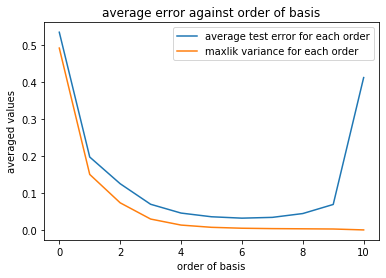

In [132]:
orders_list = list(range(0,11))
mse_list = []
var_list = []
for order in orders_list:
    mse, var = get_cv_loss(order=order)
    mse_list.append(mse)
    var_list.append(var)
fig3 = plt.figure()
plt.plot(orders_list, mse_list, label='average test error for each order')
plt.plot(orders_list, var_list, label='maxlik variance for each order')
plt.title('average error against order of basis')
plt.xlabel('order of basis')
plt.ylabel('averaged values')
plt.legend()
plt.savefig("average error against order of basis for (c).png") 
plt.show()